In [1]:
import os
import numpy as np
import pandas as pd
import scipy.signal as sig

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
x = pd.read_csv(os.path.join('data','eeg.txt'))
x[:10].T

,0,1,2,3,4,5,6,7,8,9
C3A1,-0.9562,-0.8962,-3.1877,-4.1783,-5.319,-6.1896,-7.8006,-6.9701,-0.7061,2.3058


In [3]:
x = x['C3A1']

In [4]:
N = len(x)
fs = 100 # Hz
t = np.arange(N)/100

In [5]:
# Take a snippet of the signal to lower CWT computation cost.
i = (190 < t) & (t < 210)
x = x[i]
t = t[i]

In [6]:
s = range(1,60)
c = sig.cwt(x, sig.ricker, s)

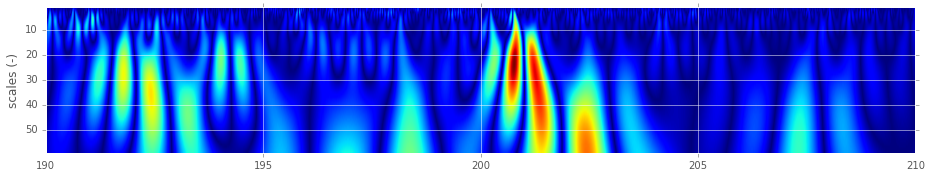

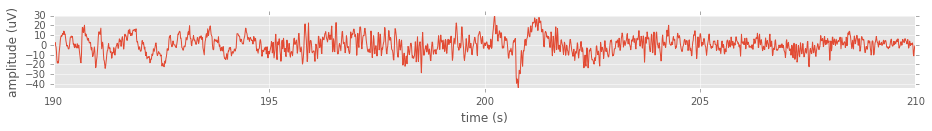

In [7]:
plt.figure(figsize=0.8*plt.figaspect(0.2))
plt.imshow(np.abs(c), extent=(t[0], t[-1], s[-1], s[0]))
plt.axis('tight')
plt.tight_layout()
plt.ylabel('scales (-)')

plt.figure(figsize=0.8*plt.figaspect(0.1))
plt.plot(t,x)
plt.axis('tight')
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('amplitude (uV)')